In [1]:
#import required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#train data

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#test data

test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [7]:
#SalePrice

train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

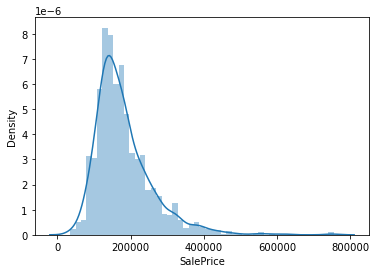

In [9]:
sns.distplot(train_df['SalePrice'])

In [10]:
#Skewness

train_df['SalePrice'].skew()

1.8828757597682129

In [11]:
#Kurtosis

train_df['SalePrice'].kurt()

6.536281860064529

In [12]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

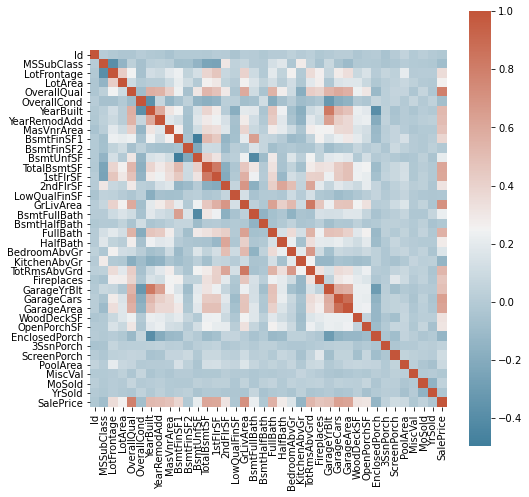

In [13]:
#Correlation Heatmap

corr_df=train_df.corr() 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
xticklabels=corr_df.columns
yticklabels=corr_df.columns

f,ax =plt.subplots(figsize=(8,8)) 
sns.heatmap(corr_df,cmap=cmap,cbar=True, 
            xticklabels=xticklabels,yticklabels=yticklabels,
            square=True,vmax=1)

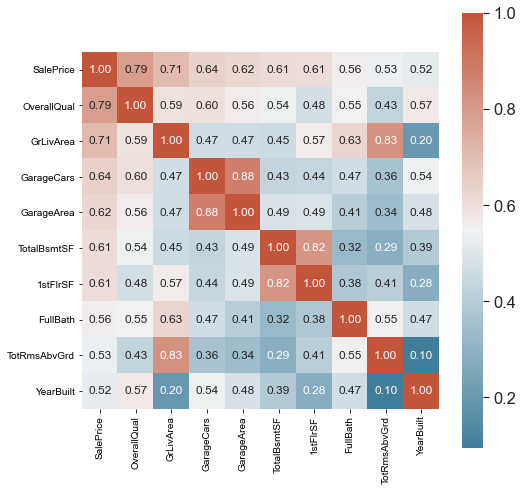

In [14]:
#Zoom to find more strong independent features correlates with saleprice with k i.e., no. of variables for heatmap as 10

k = 10 
cols = corr_df.nlargest(k, 'SalePrice')['SalePrice'].index
corrm = np.corrcoef(train_df[cols].values.T)
yticklabels=cols.values
xticklabels=cols.values

f1,ax1 =plt.subplots(figsize=(8,8))
sns.set(font_scale=1.5)
hm = sns.heatmap(corrm, cmap=cmap,cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, yticklabels=yticklabels, xticklabels=xticklabels)
plt.show()

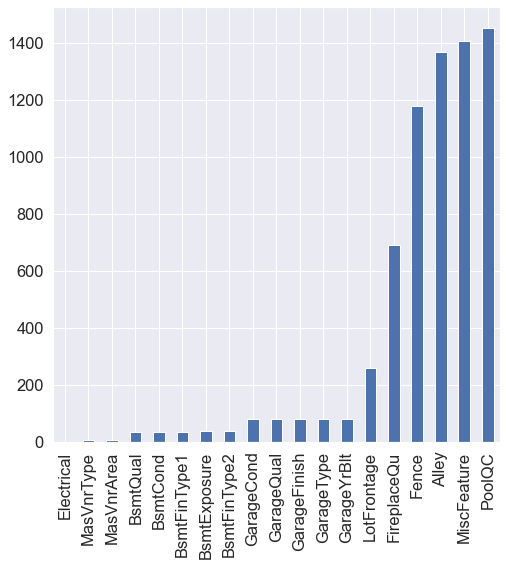

In [15]:
#Missing Values

plt.figure(num=None, figsize=(8, 8))
missing = train_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

In [16]:
#deleting the columns with high missing values

del train_df['PoolQC'], train_df['MiscFeature'], train_df['Alley'], train_df['Fence']
del test_df['PoolQC'], test_df['MiscFeature'], test_df['Alley'], test_df['Fence']

In [17]:
sum = train_df.isnull().sum().sort_values(ascending=False)
percent=(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False)
missing_val=pd.concat([sum,percent],axis=1,keys=['Sum','Percentage'])
missing_val.head(25)

,Sum,Percentage
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247


In [18]:
train_df.shape

(1460, 77)

In [19]:
test_df.shape

(1459, 76)

In [20]:
train_df1=train_df.drop((missing_val[missing_val['Percentage']>2]).index,1)

In [21]:
train_df1.shape

(1460, 65)

In [22]:
train_df1.drop('MasVnrArea',axis=1,inplace=True)
train_df1.drop('MasVnrType',axis=1,inplace=True)

In [23]:
#Remove one row

train_df1=train_df1.drop(train_df1[train_df1['Electrical'].isnull()].index)

In [24]:
train_df1.shape

(1459, 63)

In [25]:
if train_df1.isnull().sum().max()>0:
    print("Missing Values")
else:
    print('No Missing Values')

No Missing Values


In [26]:
#Seperating Numerical and Categorical features

num_df= [col for col in train_df1.columns if train_df1[col].dtype in ['int64','float64']]
cat_df= [col for col in train_df1.columns if train_df1[col].dtype in ['object']]

In [27]:
train_df1.drop(cat_df,axis=1,inplace=True)

In [28]:
train_df1.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [29]:
train_df1.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [30]:
col = ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
       'GarageArea','BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
train_df1.drop(col,axis=1, inplace=True)

In [31]:
train_df1.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice'],
      dtype='object')

In [32]:
train_df1.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice
0,7,2003,856,856,1710,2,8,2,208500
1,6,1976,1262,1262,1262,2,6,2,181500
2,7,2001,920,920,1786,2,6,2,223500
3,7,1915,756,961,1717,1,7,3,140000
4,8,2000,1145,1145,2198,2,9,3,250000


In [33]:
#Test Data

total = test_df.isnull().sum().sort_values(ascending=False)
percent=(test_df.isnull().sum()/len(test_df)*100).sort_values(ascending=False)
miss_test_df=pd.concat([total,percent],axis=1,keys=['Total_Null','Percent'])
miss_test_df.head(40)

,Total_Null,Percent
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
GarageType,76,5.209047
BsmtCond,45,3.084304
BsmtQual,44,3.015764
BsmtExposure,44,3.015764


In [34]:
test_df1=test_df.drop((miss_test_df[miss_test_df['Total_Null']>1]).index,1)

In [35]:
test_df1.shape

(1459, 57)

In [36]:
test_df1.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [37]:
test_df1.dtypes[test_df1.dtypes == np.object]

Street           object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [38]:
test_df1.dtypes[test_df1.dtypes == np.float64]

BsmtFinSF1     float64
BsmtFinSF2     float64
BsmtUnfSF      float64
TotalBsmtSF    float64
GarageCars     float64
GarageArea     float64
dtype: object

In [39]:
testcol =['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour', 
          'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
          'BldgType', 'HouseStyle', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 
          'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 
          'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 
          'HeatingQC', 'CentralAir','Electrical', '2ndFlrSF', 'LowQualFinSF', 
          'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 
          'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
          'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType','SaleCondition']
test_df1.drop(testcol, axis=1,inplace=True)

In [40]:
test_df1['GarageCars'].fillna(value = test_df1['GarageCars'].median(),inplace = True)
test_df1['TotalBsmtSF'].fillna(value = test_df1['TotalBsmtSF'].median(),inplace = True)

In [41]:
test_df1.drop('GarageArea',axis=1,inplace=True)

In [42]:
test_df1.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
0,5,1961,882.0,896,896,1,5,1.0
1,6,1958,1329.0,1329,1329,1,6,1.0
2,5,1997,928.0,928,1629,2,6,2.0
3,6,1998,926.0,926,1604,2,7,2.0
4,8,1992,1280.0,1280,1280,2,5,2.0


In [43]:
test_df1.shape

(1459, 8)

In [44]:
# Check any missing Values
if test_df1.isnull().sum().max()>0:
    print("Missing Values")
else:
    print('No Missing Values')

No Missing Values


In [45]:
#Outliers

train_df1.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice'],
      dtype='object')

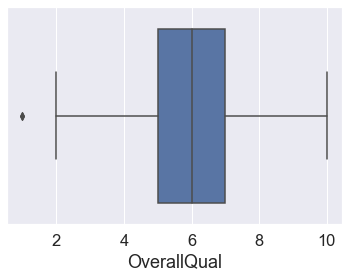

In [46]:
#OverallQual

sns.boxplot(train_df1['OverallQual']);

In [47]:
train_df1.drop(train_df1[train_df1['OverallQual'] < 2].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='TotalBsmtSF'>

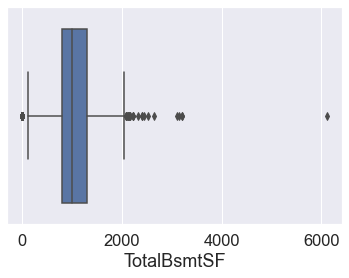

In [48]:
#TotalBsmtSF

sns.boxplot(train_df1['TotalBsmtSF'])

In [49]:
train_df1.drop(train_df1[train_df1['TotalBsmtSF'] > 3500].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='1stFlrSF'>

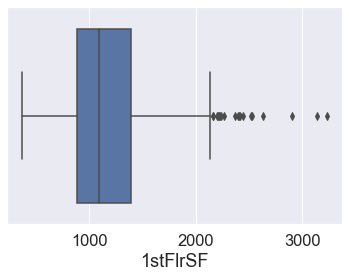

In [50]:
#1stFlrSF

sns.boxplot(train_df1['1stFlrSF'])

In [51]:
train_df1.drop(train_df1[train_df1['1stFlrSF'] > 2500].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='GrLivArea'>

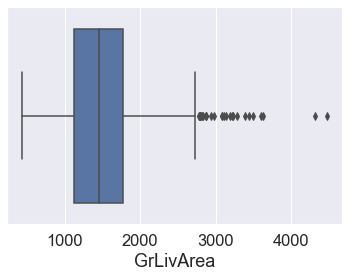

In [52]:
#GrLivArea

sns.boxplot(train_df1['GrLivArea'])

In [53]:
train_df1.drop(train_df1[train_df1['GrLivArea'] > 4000].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='FullBath'>

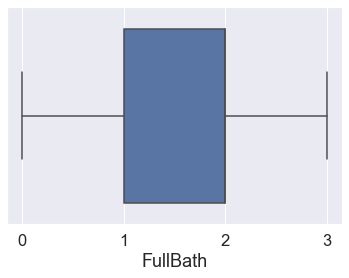

In [54]:
#FullBath

sns.boxplot(train_df1['FullBath'])

<AxesSubplot:xlabel='TotRmsAbvGrd'>

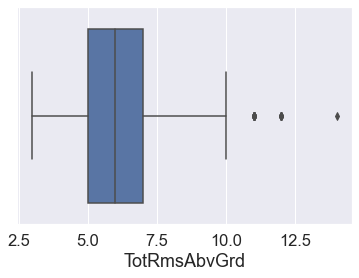

In [55]:
#TotRmsAbvGrd

sns.boxplot(train_df1['TotRmsAbvGrd'])

In [56]:
train_df1.drop(train_df1[train_df1['TotRmsAbvGrd'] > 11].index, axis = 0, inplace = True)

<AxesSubplot:xlabel='GarageCars'>

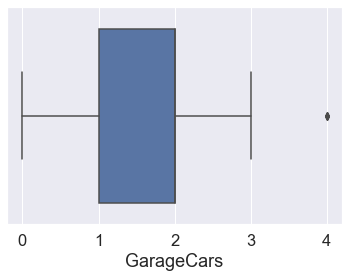

In [57]:
#GarageCars

sns.boxplot(train_df1['GarageCars'])

In [58]:
train_df1.drop(train_df1[train_df1['GarageCars'] > 3.5].index, axis = 0, inplace = True)

In [59]:
#YearBuilt
#Convert YearBuilt into Years

train_df1['Years']=2021-train_df1['YearBuilt']
train_df1.drop('YearBuilt',axis=1,inplace=True)

In [60]:
train_df1.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice,Years
0,7,856,856,1710,2,8,2,208500,18
1,6,1262,1262,1262,2,6,2,181500,45
2,7,920,920,1786,2,6,2,223500,20
3,7,756,961,1717,1,7,3,140000,106
4,8,1145,1145,2198,2,9,3,250000,21


<AxesSubplot:xlabel='Years'>

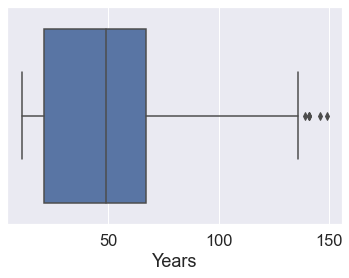

In [61]:
sns.boxplot(train_df1['Years'])

In [62]:
train_df1.drop(train_df1[train_df1['Years'] > 145].index, axis = 0, inplace = True)

In [63]:
train_df1.shape

(1431, 9)

In [64]:
train_df1.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice,Years
0,7,856,856,1710,2,8,2,208500,18
1,6,1262,1262,1262,2,6,2,181500,45
2,7,920,920,1786,2,6,2,223500,20
3,7,756,961,1717,1,7,3,140000,106
4,8,1145,1145,2198,2,9,3,250000,21


In [65]:
train_df1=train_df1.reindex(columns=['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'Years','SalePrice'])

In [66]:
train_df1.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years,SalePrice
0,7,856,856,1710,2,8,2,18,208500
1,6,1262,1262,1262,2,6,2,45,181500
2,7,920,920,1786,2,6,2,20,223500


In [67]:
#We convert the YearBuilt for test data

test_df1['Years']=2021-test_df1['YearBuilt']
test_df1.drop('YearBuilt',axis=1,inplace=True)
test_df1.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,5,882.0,896,896,1,5,1.0,60
1,6,1329.0,1329,1329,1,6,1.0,63
2,5,928.0,928,1629,2,6,2.0,24
3,6,926.0,926,1604,2,7,2.0,23
4,8,1280.0,1280,1280,2,5,2.0,29


In [68]:
test_df1.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,5,882.0,896,896,1,5,1.0,60
1,6,1329.0,1329,1329,1,6,1.0,63
2,5,928.0,928,1629,2,6,2.0,24


In [69]:
test_df1.shape

(1459, 8)

In [70]:
#Split the data

X_train = train_df1.drop('SalePrice', axis=1)
y_train = train_df1['SalePrice']

In [71]:
X_train.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,7,856,856,1710,2,8,2,18
1,6,1262,1262,1262,2,6,2,45
2,7,920,920,1786,2,6,2,20


In [72]:
y_train.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [73]:
X_test = test_df1

In [74]:
#Import StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
X_train[:] = scaler.fit_transform(X_train[:])
X_test[:] = scaler.fit_transform(X_test[:])

In [76]:
X_train.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,0.677064,-0.472565,-0.824644,0.458352,0.824177,1.010436,0.330859,-1.055503
1,-0.064803,0.536137,0.313033,-0.484504,0.824177,-0.298101,0.330859,-0.151859
2,0.677064,-0.313558,-0.645306,0.618301,0.824177,-0.298101,0.330859,-0.988567


In [77]:
X_test.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,-0.751101,-0.370716,-0.654561,-1.215588,-1.028720,-0.918335,-0.988189,0.340945
1,-0.054877,0.639230,0.433298,-0.323539,-1.028720,-0.255371,-0.988189,0.439695
2,-0.751101,-0.266784,-0.574165,0.294508,0.773083,-0.255371,0.301406,-0.844059


In [78]:
#Linear Regression

from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [79]:
reg1.score(X_train, y_train)

0.819397060103233

In [80]:
predic = reg1.predict(X_test)
predic

array([111281.18005994, 171948.02707679, 170730.20443579, ...,
       153158.58840284, 118705.76860596, 236882.22107174])

In [81]:
out_linear = pd.DataFrame({'Id': test_df.Id,'SalePrice':predic})
out_linear

,Id,SalePrice
0,1461,111281.180060
1,1462,171948.027077
2,1463,170730.204436
3,1464,186134.128463
4,1465,216077.734043
...,...,...
1454,2915,84892.643463
1455,2916,93771.953031
1456,2917,153158.588403
1457,2918,118705.768606


In [82]:
#RFE-Recursive Feature Elimination

from sklearn.feature_selection import RFE

rfe = RFE(reg1, 8)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [83]:
cols = X_train.columns[rfe.support_]
cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'Years'],
      dtype='object')

In [84]:
reg1.fit(X_train[cols],y_train)

LinearRegression()

In [85]:
reg1.score(X_train[cols], y_train)  #All the features have been selected by RFE.

0.819397060103233

In [86]:
y_pred = reg1.predict(X_test[cols])

In [87]:
y_pred

array([111281.18005994, 171948.02707679, 170730.20443579, ...,
       153158.58840284, 118705.76860596, 236882.22107174])

In [88]:
out_rfe = pd.DataFrame({'Id': test_df.Id,'SalePrice':y_pred})
out_rfe

,Id,SalePrice
0,1461,111281.180060
1,1462,171948.027077
2,1463,170730.204436
3,1464,186134.128463
4,1465,216077.734043
...,...,...
1454,2915,84892.643463
1455,2916,93771.953031
1456,2917,153158.588403
1457,2918,118705.768606


In [89]:
#RidgeCV

from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)


rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)


train_score=reg1.score(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)

Ridge_train_score100 = rr100.score(X_train,y_train)


print('train_score: ', train_score)
print('\nRidge_train_score: ', Ridge_train_score)
print('\nRidge_train_score100: ', Ridge_train_score100)



train_score:  0.819397060103233

Ridge_train_score:  0.8193970600639663

Ridge_train_score100:  0.817227045583128


In [90]:
#LassoCV 

from sklearn.linear_model import LassoCV
reg2 = LassoCV()
reg2.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg2.alpha_)
print("Best score using built-in LassoCV: %f" %reg2.score(X_train,y_train))
coef = pd.Series(reg2.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 368.207558
Best score using built-in LassoCV: 0.819056


Text(0.5, 1.0, 'Important Features from Lasso')

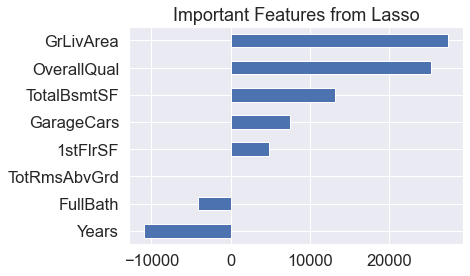

In [91]:
imp_coef = coef.sort_values()

imp_coef.plot(kind = "barh")
plt.title("Important Features from Lasso")

In [92]:
#Statsmodel - OLS(Ordinary Least Squares)

import statsmodels.api as sm

X_train.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Years
0,0.677064,-0.472565,-0.824644,0.458352,0.824177,1.010436,0.330859,-1.055503
1,-0.064803,0.536137,0.313033,-0.484504,0.824177,-0.298101,0.330859,-0.151859
2,0.677064,-0.313558,-0.645306,0.618301,0.824177,-0.298101,0.330859,-0.988567


In [93]:
y_train.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [94]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [95]:
model = sm.OLS(y_train, X_train).fit()

In [96]:
predictions = model.predict(X_test)

In [97]:
predictions

0       111281.180060
1       171948.027077
2       170730.204436
3       186134.128463
4       216077.734043
            ...      
1454     84892.643463
1455     93771.953031
1456    153158.588403
1457    118705.768606
1458    236882.221072
Length: 1459, dtype: float64

In [98]:
out_stats1 = pd.DataFrame({'Id': test_df.Id,'SalePrice':predictions})
out_stats1

,Id,SalePrice
0,1461,111281.180060
1,1462,171948.027077
2,1463,170730.204436
3,1464,186134.128463
4,1465,216077.734043
...,...,...
1454,2915,84892.643463
1455,2916,93771.953031
1456,2917,153158.588403
1457,2918,118705.768606


In [99]:
out_stats2 = model.summary()
out_stats2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     806.5
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:31:24   Log-Likelihood:                -16860.
No. Observations:                1431   AIC:                         3.374e+04
Df Residuals:                    1422   BIC:                         3.379e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.791e+05    839.950    213.200      0.000    1.77e+05    1.81e+05
OverallQual   2.525e+04   1366.773     18.472      0.000    2.26e+04    2.79e+04
TotalBsmtSF    1.31e+04   1515.830      8.639      0.000    1.01e+04    1.61e+04
1stFlrSF      5065.4425   1510.762      3.353      0.001    2101.882    8029.003
GrLivArea     2.964e+04   1826.420     16.230      0.000    2.61e+04    3.32e+04
FullBath     -5392.9908   1223.750     -4.407      0.000   -7793.540   -2992.441
TotRmsAbvGrd -1424.2512   1508.363     -0.944      0.345   -4383.107    1534.604
GarageCars    7617.5361   1179.892      6.456      0.000    5303.021    9932.051
Years        -1.161e+04   1225.859     -9.468      0.000    -1.4e+04   -9202.073
==============================================================================
Omnibus:                      340.528   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2412.305
Skew:                           0.916   Prob(JB):                         0.00
Kurtosis:                       9.091   Cond. No.                         5.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#OLS Regression Results:

#Adjusted R-Square is the fit of the model, near to 1 is a good fit.
#Const Coef is the Y-intercept, when the coef of all the other variables are zero.
#The other Coef's are of them respectively when the coef of all the other variables are zero.
#std err is the level of accuracy, the lower it is, the higher the accuracy'
#p > t is the p-value, less than 0.05 is significant.
#Confidence interval is the range in which the coefficients are likely to fall (95%) i.e., 0.025 to 0.975 